In [200]:
import scipy as sc
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import copy

# Generating data

In [201]:
mu = [0.0,3,6]
sigma = [.9,.9,.9]
samplesize = 200
dists = []
dimension = 1
dists.append(np.random.normal(mu[0], sigma[0], size=[dimension,samplesize]).flatten())
dists.append(np.random.normal(mu[1], sigma[1], size=[dimension,samplesize]).flatten())
dists.append(np.random.normal(mu[2], sigma[2], size=[dimension,samplesize]).flatten())
weights = [0.3,.4,.3]

In [202]:
data = np.array(dists).T

# Generating noise

In [203]:
noise = np.random.normal(0, 0.1, size=[1,samplesize]).flatten()

In [204]:
data = np.array(data)

# Distribution plot of features

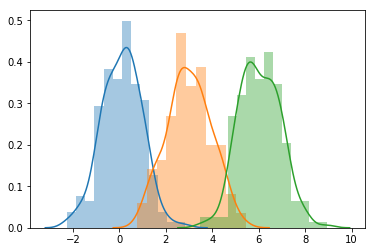

In [205]:
sns.distplot(data.T[0],label="feature1")
sns.distplot(data.T[1],label="feature2")
sns.distplot(data.T[2],label="feature3")

In [206]:
# data

In [207]:
data.shape

(200, 3)

# Adding noise to each feature in data

In [208]:
noisydata = copy.deepcopy(data)
for i in range(len(noisydata)):
    tmp = 0.0
    for j in range(len(noisydata[i])):
        noisydata[i][j] += noise[i]

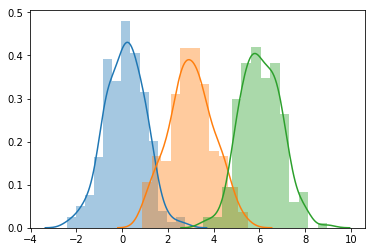

In [209]:
sns.distplot(noisydata.T[0],label="feature1")
sns.distplot(noisydata.T[1],label="feature2")
sns.distplot(noisydata.T[2],label="feature3")

In [210]:
decision = []
for i in range(len(data)):
    tmp = 0.0
    for j in range(len(data[i])):
        tmp += (weights[j] * data[i][j])  
    decision.append(tmp)

In [211]:
decision = np.array(decision).flatten()

# Decision distribution

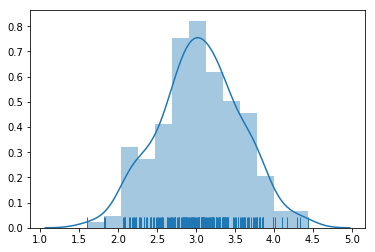

In [212]:
sns.distplot(decision,rug=True)

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [214]:
# shuffle([1,2,3],[0,1,2])

In [215]:
bootstrap = []
for i in range(1000):
    noisydata,decision = shuffle(noisydata,decision)
    X_train, X_test, y_train, y_test = train_test_split(noisydata, decision, test_size=0.30, shuffle=False)
    reg = LinearRegression().fit(X_train,y_train)
    bootstrap.append(reg.score(X_test,y_test))

# box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc48fc075f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc48fc07c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc48fc07208>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc48fc12358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc48fc126a0>],
 'means': []}

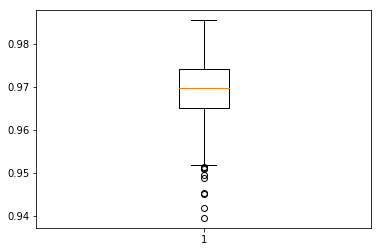

In [216]:
plt.boxplot(bootstrap)

#### the points below the lines indicate outliers detected by the boxplot

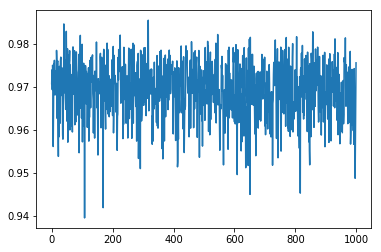

In [217]:
plt.plot(bootstrap)

In [221]:
# Add noise to decision

bootstrap2 = []
for i in range(1000):
    noisydata,decision = shuffle(noisydata,decision)
    decision2 = decision + noise
    X_train, X_test, y_train, y_test = train_test_split(noisydata, decision2, test_size=0.30, shuffle=False)
    reg = LinearRegression().fit(X_train,y_train)
    bootstrap2.append(reg.score(X_test,y_test))

plt.boxplot(bootstrap2)

plt.plot(bootstrap2)